<a href="https://colab.research.google.com/github/steenbergen/DeepLearn/blob/main/feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

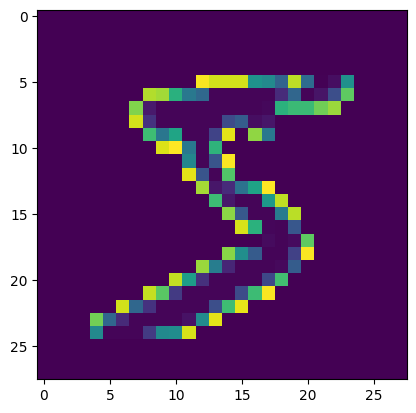

In [5]:
import numpy as np
import PIL.Image as pil
from matplotlib import pyplot as plt
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt


img1 = train_images[0]
gen_image(img1)

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**uint8** is an 8-bit unsigned integer from 0 through 255.

# Model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [13]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
# Getting data normalized and in a format that Keras likes
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
# I ammended this code to have a 20% validation set.
# This can help us assess whether we are over-training.
fitted = model.fit(train_images, train_labels,
          epochs = 20, batch_size = 128, validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 1s 4ms/step - loss: 8.1072e-05 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9827
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 7.8965e-05 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9832
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 7.7129e-05 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9829
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 7.4903e-05 - accuracy: 1.0000 - val_loss: 0.0936 - val_accuracy: 0.9827
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 7.3553e-05 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9828
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 7.1723e-05 - accuracy: 1.0000 - val_loss: 0.0941 - val_accuracy: 0.9827
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 7.0149e-05 - accuracy: 1.0000 - val_loss: 0.0943 -

In [19]:
print(fitted.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


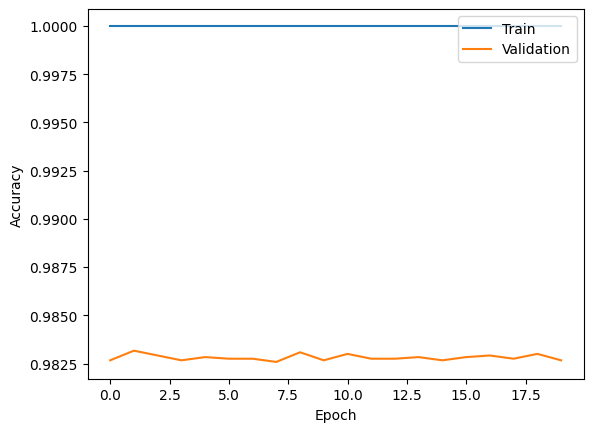

In [22]:
import matplotlib.pyplot as plt
plt.plot(fitted.history["accuracy"])
plt.plot(fitted.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

In [23]:
fitted.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [24]:
test_digits = test_images[0:1]
predictions = fitted.model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 149ms/step


array([1.7787662e-15, 1.6154255e-16, 5.0992332e-13, 7.3502015e-08,
       1.5238472e-22, 3.5230607e-16, 8.0508437e-23, 9.9999988e-01,
       6.7856496e-15, 2.6174254e-10], dtype=float32)

In [25]:
predictions[0].argmax()

7

In [26]:
test_loss, test_acc = fitted.model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9829
Test Accuracy: 0.9829000234603882
